# <center><span style="color:black"> Modeling of Internal Damping of Beam and Analysis Using FEM</span><center>

##### <center> MTP Project <center>
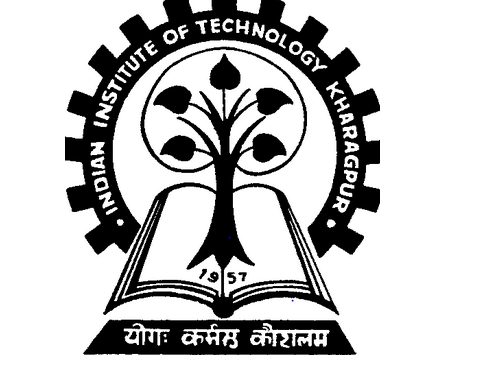
#### <center> Pankaj Suhas Pandit(21ME63R08)<center>

## Basic Model:

* l = 300 mm 
* w = 40 mm 
* t = 4 mm

## Why Material Important: 
* Material damping arises from the atomic arrangement of the beams as well as its impurities. Hence, material damping is a type of microscopic damping as it exists at a molecular level. Due to this, different materials have different damping properties.
* The Damping ability of Material allow it to absorb energy for irriversible processes during its cyclic deformation.

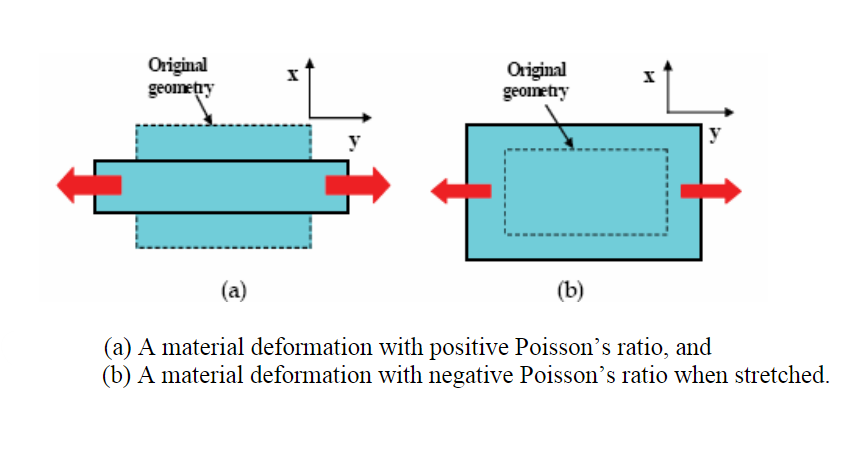

## What is Auxetic Material?
* Normally poisson's ratio defined as negative ratio of transverse strain to axial strain in direction of Loading.
* Positive poisson's ratio materials have stretching expected to make a material thinner and compressing result in bulge.
* This common knowledge challenged by auxetic material, which exhibit very unusual property of becoming wider when streched and narrower when compressed.

## Properties:
* Such materials are expected to have mechanical properties such as high energy absorption and fracture resistance.
* Auxetic materials have low density which allow the hinge like areas of auxetic microstructure to flex.

## Applications:
* What type of material behaviour
* Vibration control - Vibration damping is a crucial requirement for designing many electronic products. Many applications and products are subjected tovibration which may be due to internal or external sources. Damping materialswork by changing the natural vibration frequency of vibrating surface hencereducing the radiated noise and increasing the transmission loss of the material.
* Damage assessment - Vibration-based damage assessment algorithms are usedto assess the damage in composites or concrete structures. The material damping indicates the damage level, damping in the structure is monitored periodically with increased damping corresponding to increased damage.
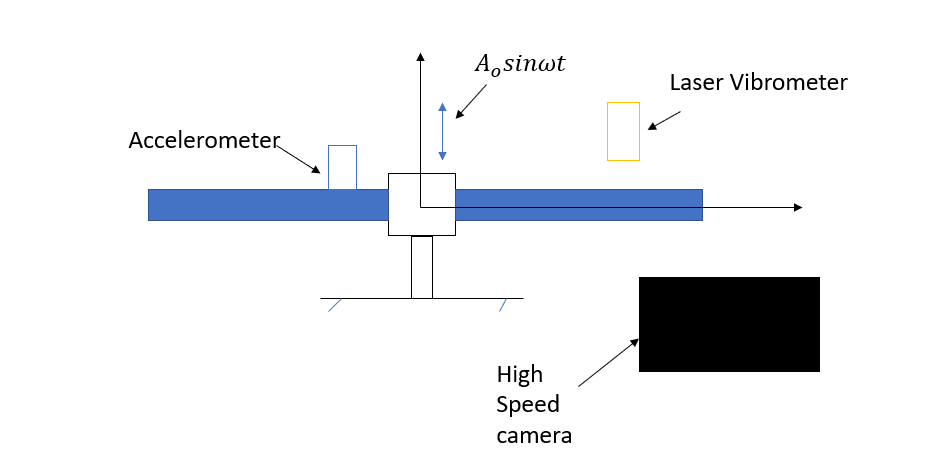

In [1]:
import sympy as sym
import numpy as np
from math import sin

In [2]:
b0,b1,b2,b3,A0 = sym.symbols('b_0,b_1,b_2,b_3,A_0')
x,l,t,dj,h,u,l,w=sym.symbols('x,l,t,d_j,d,u,l,w')

## <span style="color:green"> The Equation of Motion Without Considering Damping </span>
<font size="4">
\begin{align*}
  \rho Aw_{,tt} + EIw_{,xxxx}= 0
 \end{align*}
 </font>

#### <span style="color:green"> Boundary Conditions are:</span>
<font size="3">
\begin{align*}
w_{,x}(0,t) = 0 \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
w_{,xx}(l,t) = 0 \
 \end{align*}
 </font>

<font size="3">
\begin{align*}
w_{,xxx}(l,t) = 0\
 \end{align*}
 </font>
 
 <font size="3">
\begin{align*}
w(0,t) = {A_0}\sin \Omega t \
 \end{align*}
 </font>

In [3]:
h = b0 + b1*x + b2*x**2 + b3*x**3
from IPython.display import Math, Latex
display(Math(r'h(x,t) = {}'.format(sym.latex(h))))

<IPython.core.display.Math object>

#### <span style="color:green"> New Boundary Conditions Become :</span>
 <font size="3">
\begin{align*}
u(0,t) = 0  .....(1) \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
u_{,x}(0,t) = 0  .....(2) \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
u_{,xx}(l,t) = 0  .....(3) \
 \end{align*}
 </font>

<font size="3">
\begin{align*}
u_{,xxx}(l,t) = 0  .....(4) \
 \end{align*}
 </font>

In [4]:
diff_1 = sym.diff(h,x)
diff_1

b_1 + 2*b_2*x + 3*b_3*x**2

In [5]:
diff_2 = sym.diff(h,x,2).simplify()
diff_2

2*b_2 + 6*b_3*x

In [6]:
diff_3 = sym.diff(h,x,3).simplify()
diff_3

6*b_3

## <span style="color:green"> We Know the very important Relation:</span>
 <font size="3">
\begin{align*}
w(x,t) = u(x,t) + \beta(x){A_0}\sin \Omega t \
 \end{align*}
 </font>
 
#### Where:
<font size="3">
\begin{align*}
 u(x,t) = new-field-variable \\
\beta(x) = unknown-function
 \end{align*}
 </font>
 
 
#### <span style="color:green"> For satisfying boundary condition 1, 2, 3, 4 we get BCs:</span>

<font size="3">
\begin{align*}
\beta(0) = 1   \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
\beta('0) = 0  \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
\beta(''l) = 0 \
 \end{align*}
 </font>

<font size="3">
\begin{align*}
\beta('''l) = 0 \
 \end{align*}
 </font>

In [7]:
eq_1 = sym.Eq(h,1)
eq1 = eq_1.replace(x,0)
display(eq1)

Eq(b_0, 1)

In [8]:
eq_2 = sym.Eq(diff_1,0)
eq2 = eq_2.replace(x,0)
display(eq2)

Eq(b_1, 0)

In [9]:
eq3 = diff_2.replace(x,l)
eq_3 = sym.Eq(eq3,0)
display(eq_3)

Eq(2*b_2 + 6*b_3*l, 0)

In [10]:
eq4 = diff_3.replace(x,l)
eq_4 = sym.Eq(eq4,0)
display(eq_4)

Eq(6*b_3, 0)

#### <span style="color:red"> We Know the one important boundary condition as specify earlier:</span>
 <font size="3">
\begin{align*}
w(x,t) = u(x,t) + {A_0}\sin \Omega t \
 \end{align*}
 </font>

* In above Boundary condition we differentiate W with respect to t :

<font size="3">
\begin{align*}
w_{,t} = u_{,t} + {A_0} \Omega \cos \Omega t \
 \end{align*}
 </font>
 
* Again differentiate W with respect to t. The Boundary Condition become:
<font size="3">
\begin{align*}
w_{,tt} = u_{,tt} - {A_0} \Omega^2 \sin \Omega t \
 \end{align*}
 </font>
 
 
## <span style="color:green"> Now we have to put this boundary condition into The Equation of Motion :</span>
<font size="3">
\begin{align*}
  \rho Aw_{,tt} + EIw_{,xxxx}= 0
 \end{align*}
 </font>


* After putting value:

<font size="3">
\begin{align*}
  \rho A(u_{,tt} - {A_0} \Omega^2 \sin \Omega t) + EIu_{,xxxx}= 0
 \end{align*}
 </font>

<font size="3">
\begin{align*}
  \rho Au_{,tt} - \rho A{A_0} \Omega^2 \sin \Omega t + EIu_{,xxxx}= 0
 \end{align*}
 </font>
 
# <span style="color:red"> Final Equation Become :</span>
<font size="3">
\begin{align*}
  \rho Au_{,tt}  + EIu_{,xxxx}=  \rho A{A_0} \Omega^2 \sin \Omega t \\
 \end{align*}
 </font>
 


* We know that the Equation of motion:
\begin{align*}
F = -mass(m) * acceleration(a)..........(1)\\
\rho = \frac{m}{v}\\
\end{align*}
* Hence:
* As v = A*L : small element is to be considered hence L neglected:
\begin{align*}
m = \rho A..........(2)
\end{align*}

* Differetial Equation of Harmonic Excitation is : 

$$
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0\\
$$
* where:
$$
\frac{d^2x}{dt^2} = Acceleration \\
\frac{k}{m} = \Omega^2 \\
x = Displacement
$$
* In our case displacement is:
\begin{align*}
x = {A_0}\sin \Omega t \\
 \end{align*}
* Hence final equation become:
$$
\frac{d^2x}{dt^2} = -{A_0}\Omega^2\sin \Omega t..........(3) \\
$$

* After putting eqn 2 and eqn 3 in eqn final eqn become:
\begin{align*}
[ F = \rho A{A_0}\Omega^2\sin \Omega t]\\
\end{align*}

# Now we calculating solution for this

In [11]:
b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,A0 = sym.symbols('b_0,b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10,A_0')

In [12]:
x,l,t=sym.symbols('x,l,t')

In [13]:
Px = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 +  b6*x**6 +  b7*x**7 +  b8*x**8 + b9*x**9 + b10*x**10
from IPython.display import Math, Latex
display(Math(r'P(x,t) = {}'.format(sym.latex(Px))))

<IPython.core.display.Math object>

In [14]:
diff_1 = sym.diff(Px,x)
diff_1

b_1 + 10*b_10*x**9 + 2*b_2*x + 3*b_3*x**2 + 4*b_4*x**3 + 5*b_5*x**4 + 6*b_6*x**5 + 7*b_7*x**6 + 8*b_8*x**7 + 9*b_9*x**8

In [15]:
diff_2 = sym.diff(Px,x,2).simplify()
diff_2

90*b_10*x**8 + 2*b_2 + 6*b_3*x + 12*b_4*x**2 + 20*b_5*x**3 + 30*b_6*x**4 + 42*b_7*x**5 + 56*b_8*x**6 + 72*b_9*x**7

In [16]:
diff_3 = sym.diff(Px,x,3).simplify()
diff_3

720*b_10*x**7 + 6*b_3 + 24*b_4*x + 60*b_5*x**2 + 120*b_6*x**3 + 210*b_7*x**4 + 336*b_8*x**5 + 504*b_9*x**6

#### <span style="color:green">  Boundary Conditions Become :</span>
 <font size="3">
\begin{align*}
P(0,t) = 0  .....(1) \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
P'(0,t) = 0  .....(2) \
 \end{align*}
 </font>
 
<font size="3">
\begin{align*}
P''(l,t) = 0  .....(3) \
 \end{align*}
 </font>

<font size="3">
\begin{align*}
P'''(l,t) = 0  .....(4) \
 \end{align*}
 </font>
 
* From Boundary Condition 1:

In [17]:
eq_1 = sym.Eq(Px,0)
eq1 = eq_1.replace(x,0)
display(eq1)

Eq(b_0, 0)

* From Boundary condition 2:

In [18]:
eq_2 = sym.Eq(diff_1,0)
eq2 = eq_2.replace(x,0)
display(eq2)

Eq(b_1, 0)

* From Boundary Condition 3:

In [19]:
eq_3 = sym.Eq(diff_2,0)
eq3 = eq_3.replace(x,l)
display(eq3)

Eq(90*b_10*l**8 + 2*b_2 + 6*b_3*l + 12*b_4*l**2 + 20*b_5*l**3 + 30*b_6*l**4 + 42*b_7*l**5 + 56*b_8*l**6 + 72*b_9*l**7, 0)

* From Boundary Condition 4:

In [20]:
eq_4 = sym.Eq(diff_3,0)
eq4 = eq_4.replace(x,l)
display(eq4)

Eq(720*b_10*l**7 + 6*b_3 + 24*b_4*l + 60*b_5*l**2 + 120*b_6*l**3 + 210*b_7*l**4 + 336*b_8*l**5 + 504*b_9*l**6, 0)

In [21]:
soln = sym.linsolve([eq3,eq4],[b3,b4])
display(soln)

{((270*b_10*l**8 - 2*b_2 + 10*b_5*l**3 + 30*b_6*l**4 + 63*b_7*l**5 + 112*b_8*l**6 + 180*b_9*l**7)/(3*l), (-315*b_10*l**8 + b_2 - 20*b_5*l**3 - 45*b_6*l**4 - 84*b_7*l**5 - 140*b_8*l**6 - 216*b_9*l**7)/(6*l**2))}

In [22]:
L = [soln]
L

[{((270*b_10*l**8 - 2*b_2 + 10*b_5*l**3 + 30*b_6*l**4 + 63*b_7*l**5 + 112*b_8*l**6 + 180*b_9*l**7)/(3*l), (-315*b_10*l**8 + b_2 - 20*b_5*l**3 - 45*b_6*l**4 - 84*b_7*l**5 - 140*b_8*l**6 - 216*b_9*l**7)/(6*l**2))}]

In [23]:
b3_new = (270*b10*l**8 - 2*b2 + 10*b5*l**3 + 30*b6*l**4 + 63*b7*l**5 + 112*b8*l**6 + 180*b9*l**7)/(3*l)
b3_new

(270*b_10*l**8 - 2*b_2 + 10*b_5*l**3 + 30*b_6*l**4 + 63*b_7*l**5 + 112*b_8*l**6 + 180*b_9*l**7)/(3*l)

In [24]:
b4_new = (-315*b10*l**8 + b2 - 20*b5*l**3 - 45*b6*l**4 - 84*b7*l**5 - 140*b8*l**6 - 216*b9*l**7)/(6*l**2)
b4_new

(-315*b_10*l**8 + b_2 - 20*b_5*l**3 - 45*b_6*l**4 - 84*b_7*l**5 - 140*b_8*l**6 - 216*b_9*l**7)/(6*l**2)

In [25]:
Px_new = (b2*x**2 + b3_new*x**3 + b4_new*x**4 + b5*x**5 + b6*x**6 + b7*x**7 + b8*x**8 + b9*x**9 + b10*x**10 ).expand()
display(Math(r'P(x) = {}'.format(sym.latex(Px_new))))

<IPython.core.display.Math object>

#### Aim to discretize the equation of motion and first step is to choose comparision functions.
#### For dynamic mechanical problem Galerkin Method is used as method to help reduce PDE into ODE

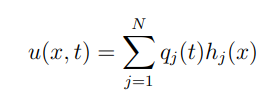

* h = Comparision Function
* q = Unknown time co-ordinate

* Hence Comparision functions are

In [26]:
h1 = Px_new.coeff(b2)
display(Math(r'h_1 = {}'.format(sym.latex(h1))))

<IPython.core.display.Math object>

In [27]:
h2 = Px_new.coeff(b5)
display(Math(r'h_2 = {}'.format(sym.latex(h2))))

<IPython.core.display.Math object>

In [28]:
h3 = Px_new.coeff(b6)
display(Math(r'h_3 = {}'.format(sym.latex(h3))))

<IPython.core.display.Math object>

In [29]:
h4 = Px_new.coeff(b7)
display(Math(r'h_4 = {}'.format(sym.latex(h4))))

<IPython.core.display.Math object>

In [30]:
h5 = Px_new.coeff(b8)
display(Math(r'h_5 = {}'.format(sym.latex(h5))))

<IPython.core.display.Math object>

In [31]:
h6 = Px_new.coeff(b9)
display(Math(r'h_6 = {}'.format(sym.latex(h6))))

<IPython.core.display.Math object>

In [32]:
h7 = Px_new.coeff(b10)
display(Math(r'h_2 = {}'.format(sym.latex(h2))))

<IPython.core.display.Math object>

In [33]:
q1 = sym.Function('q_1')(t)
q2 = sym.Function('q_2')(t)
q3 = sym.Function('q_3')(t)
q4 = sym.Function('q_4')(t)
q5 = sym.Function('q_5')(t)
q6 = sym.Function('q_6')(t)
q7 = sym.Function('q_7')(t)

In [34]:
u = (q1*h1 + q2*h2 + q3*h3 + q4*h4 + q5*h5 + q6*h6 + q7*h7 ).simplify()
from IPython.display import Math, Latex
display(Math(r'u(x,t) = {}'.format(sym.latex(u))))

<IPython.core.display.Math object>

In [35]:
rho , A , E, I, omega, X,w,cd, L = sym.symbols('rho,A,E,I,Omega,X,omega,c_d, L')

In [36]:
Y = (rho*A*sym.diff(u,t,2) + E*I*sym.diff(u,x,4))
from IPython.display import Math, Latex
display(Math(r'Y(x,t) = {}'.format(sym.latex(Y))))

<IPython.core.display.Math object>

In [37]:
e = Y - rho*A*A0*omega**2*sym.sin(omega*t)
e

-A*A_0*Omega**2*rho*sin(Omega*t) + A*rho*x**2*(l**2*x*(2*(10*l**2 - 10*l*x + 3*x**2)*Derivative(q_2(t), (t, 2)) + 3*(20*l**3 - 15*l**2*x + 2*x**3)*Derivative(q_3(t), (t, 2)) + 6*(21*l**4 - 14*l**3*x + x**4)*Derivative(q_4(t), (t, 2)) + 2*(112*l**5 - 70*l**4*x + 3*x**5)*Derivative(q_5(t), (t, 2)) + 6*(60*l**6 - 36*l**5*x + x**6)*Derivative(q_6(t), (t, 2)) + 3*(180*l**7 - 105*l**6*x + 2*x**7)*Derivative(q_7(t), (t, 2))) + (6*l**2 - 4*l*x + x**2)*Derivative(q_1(t), (t, 2)))/(6*l**2) + 4*E*I*(6*x**2*(35*x**4*q_7(t) + 20*x**3*q_6(t) + 10*x**2*q_5(t) + x*(35*x**3*q_7(t) + 15*x**2*q_6(t) + 5*x*q_5(t) + q_4(t)) + 4*x*q_4(t) + q_3(t)) + 12*x*(21*x**5*q_7(t) + 15*x**4*q_6(t) + 10*x**3*q_5(t) + 6*x**2*q_4(t) + x*(35*x**4*q_7(t) + 20*x**3*q_6(t) + 10*x**2*q_5(t) + 4*x*q_4(t) + q_3(t)) + 3*x*q_3(t) + q_2(t)) + (6*l**2*x*(21*x**5*q_7(t) + 15*x**4*q_6(t) + 10*x**3*q_5(t) + 6*x**2*q_4(t) + 3*x*q_3(t) + q_2(t)) - l**2*(4*(5*l - 3*x)*q_2(t) + 9*(5*l**2 - 2*x**2)*q_3(t) + 12*(7*l**3 - 2*x**3)*q_4(t) + 10

In [38]:
a = e * h1
a

(x**2 - 2*x**3/(3*l) + x**4/(6*l**2))*(-A*A_0*Omega**2*rho*sin(Omega*t) + A*rho*x**2*(l**2*x*(2*(10*l**2 - 10*l*x + 3*x**2)*Derivative(q_2(t), (t, 2)) + 3*(20*l**3 - 15*l**2*x + 2*x**3)*Derivative(q_3(t), (t, 2)) + 6*(21*l**4 - 14*l**3*x + x**4)*Derivative(q_4(t), (t, 2)) + 2*(112*l**5 - 70*l**4*x + 3*x**5)*Derivative(q_5(t), (t, 2)) + 6*(60*l**6 - 36*l**5*x + x**6)*Derivative(q_6(t), (t, 2)) + 3*(180*l**7 - 105*l**6*x + 2*x**7)*Derivative(q_7(t), (t, 2))) + (6*l**2 - 4*l*x + x**2)*Derivative(q_1(t), (t, 2)))/(6*l**2) + 4*E*I*(6*x**2*(35*x**4*q_7(t) + 20*x**3*q_6(t) + 10*x**2*q_5(t) + x*(35*x**3*q_7(t) + 15*x**2*q_6(t) + 5*x*q_5(t) + q_4(t)) + 4*x*q_4(t) + q_3(t)) + 12*x*(21*x**5*q_7(t) + 15*x**4*q_6(t) + 10*x**3*q_5(t) + 6*x**2*q_4(t) + x*(35*x**4*q_7(t) + 20*x**3*q_6(t) + 10*x**2*q_5(t) + 4*x*q_4(t) + q_3(t)) + 3*x*q_3(t) + q_2(t)) + (6*l**2*x*(21*x**5*q_7(t) + 15*x**4*q_6(t) + 10*x**3*q_5(t) + 6*x**2*q_4(t) + 3*x*q_3(t) + q_2(t)) - l**2*(4*(5*l - 3*x)*q_2(t) + 9*(5*l**2 - 2*x**2)*q_

In [39]:
b = e * h2

In [40]:
c = e * h3

In [41]:
d = e * h4

In [42]:
e = e * h5

In [43]:
f = e * h6

In [44]:
h = e * h7

In [45]:
def_Eqn1 = sym.integrate(a,(x,0,L)).simplify().evalf().expand() 
def_Eqn1

-0.0333333333333333*A*A_0*L**5*Omega**2*rho*sin(Omega*t)/l**2 + 0.166666666666667*A*A_0*L**4*Omega**2*rho*sin(Omega*t)/l - 0.333333333333333*A*A_0*L**3*Omega**2*rho*sin(Omega*t) + 0.0111111111111111*A*L**15*rho*Derivative(q_7(t), (t, 2))/l**2 - 0.0476190476190476*A*L**14*rho*Derivative(q_7(t), (t, 2))/l + 0.0119047619047619*A*L**14*rho*Derivative(q_6(t), (t, 2))/l**2 + 0.0769230769230769*A*L**13*rho*Derivative(q_7(t), (t, 2)) - 0.0512820512820513*A*L**13*rho*Derivative(q_6(t), (t, 2))/l + 0.0128205128205128*A*L**13*rho*Derivative(q_5(t), (t, 2))/l**2 + 0.0833333333333333*A*L**12*rho*Derivative(q_6(t), (t, 2)) - 0.0555555555555556*A*L**12*rho*Derivative(q_5(t), (t, 2))/l + 0.0138888888888889*A*L**12*rho*Derivative(q_4(t), (t, 2))/l**2 + 0.0909090909090909*A*L**11*rho*Derivative(q_5(t), (t, 2)) - 0.0606060606060606*A*L**11*rho*Derivative(q_4(t), (t, 2))/l + 0.0151515151515152*A*L**11*rho*Derivative(q_3(t), (t, 2))/l**2 + 0.1*A*L**10*rho*Derivative(q_4(t), (t, 2)) - 0.0666666666666667*A*L

In [46]:
def_Eqn2 = sym.integrate(b,(x,0,L)) 

In [47]:
def_Eqn3 = sym.integrate(c,(x,0,L)) 

In [48]:
def_Eqn4 = sym.integrate(d,(x,0,L)) 

In [49]:
def_Eqn5 = sym.integrate(e,(x,0,L)) 

In [50]:
def_Eqn6 = sym.integrate(f,(x,0,L)) 

In [51]:
def_Eqn7 = sym.integrate(h,(x,0,L)) 

In [52]:
h = [h1, h2, h3, h4, h5, h6, h7]
h[5]

60*l**6*x**3 - 36*l**5*x**4 + x**9

In [53]:
lhs = [0,0,0,0,0,0,0]
for i in range(7):
    lhs[i] = sym.integrate(e*h[i],(x,0,l)).simplify().evalf().expand()
lhs[0]

-1.67163083829751*A*A_0*Omega**2*l**11*rho*sin(Omega*t) + 44.9927085744771*A*l**21*rho*Derivative(q_7(t), (t, 2)) + 29.3100016903939*A*l**20*rho*Derivative(q_6(t), (t, 2)) + 17.6567338673634*A*l**19*rho*Derivative(q_5(t), (t, 2)) + 9.4654536102872*A*l**18*rho*Derivative(q_4(t), (t, 2)) + 4.16930747271305*A*l**17*rho*Derivative(q_3(t), (t, 2)) + 1.20234114106663*A*l**16*rho*Derivative(q_2(t), (t, 2)) + 0.643927187554639*A*l**13*rho*Derivative(q_1(t), (t, 2)) + 1565.70830957828*E*I*l**17*q_7(t) + 991.241601535719*E*I*l**16*q_6(t) + 575.833620264993*E*I*l**15*q_5(t) + 294.334563584564*E*I*l**14*q_4(t) + 121.494283494284*E*I*l**13*q_3(t) + 31.9146285812953*E*I*l**12*q_2(t) + 6.68652335319002*E*I*l**9*q_1(t)

In [54]:
q= [q1,q2,q3,q4,q5,q6,q7]
q

[q_1(t), q_2(t), q_3(t), q_4(t), q_5(t), q_6(t), q_7(t)]

In [55]:
m = [ [ 0 for i in range(7) ] for j in range(7) ]
m

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [56]:
for j in range(7):
    for k in range(7):
        m[j][k]= lhs[j].coeff(sym.diff(q[k],t,2))

In [57]:
k = [ [ 0 for i in range(7) ] for j in range(7) ]
for ia in range(7):
    for ib in range(7):
        k[ia][ib]= lhs[ia].coeff(q[ib])
k

[[6.68652335319002*E*I*l**9,
  31.9146285812953*E*I*l**12,
  121.494283494284*E*I*l**13,
  294.334563584564*E*I*l**14,
  575.833620264993*E*I*l**15,
  991.241601535719*E*I*l**16,
  1565.70830957828*E*I*l**17],
 [12.1983448650115*E*I*l**12,
  63.3891540558207*E*I*l**15,
  244.339271839272*E*I*l**16,
  597.412023706141*E*I*l**17,
  1177.00021837277*E*I*l**18,
  2037.25658036494*E*I*l**19,
  3232.13135402609*E*I*l**20],
 [42.185236985237*E*I*l**13,
  221.312187812188*E*I*l**16,
  854.435877847642*E*I*l**17,
  2091.66445221445*E*I*l**18,
  4124.8778376766*E*I*l**19,
  7145.18157136981*E*I*l**20,
  11342.9911450778*E*I*l**21],
 [95.5921393421393*E*I*l**14,
  504.788686259274*E*I*l**17,
  1951.10897435897*E*I*l**18,
  4780.56173066699*E*I*l**19,
  9434.13751390222*E*I*l**20,
  16351.1929247223*E*I*l**21,
  25969.5539973442*E*I*l**22],
 [178.07385062287*E*I*l**15,
  944.790793810402*E*I*l**18,
  3654.91701968482*E*I*l**19,
  8961.15008303244*E*I*l**20,
  17693.6382426579*E*I*l**21,
  30679.69

In [58]:
M = [ [ 0 for i in range(7) ] for j in range(7) ]
for ja in range(7):
    for jb in range(7):
        M[ja][jb]= lhs[ja].coeff(sym.diff(q[jb],t,2))
M

[[0.643927187554639*A*l**13*rho,
  1.20234114106663*A*l**16*rho,
  4.16930747271305*A*l**17*rho,
  9.4654536102872*A*l**18*rho,
  17.6567338673634*A*l**19*rho,
  29.3100016903939*A*l**20*rho,
  44.9927085744771*A*l**21*rho],
 [1.20234114106663*A*l**16*rho,
  2.25805687260796*A*l**19*rho,
  7.83565442269003*A*l**20*rho,
  17.7977811232455*A*l**21*rho,
  33.2116478292949*A*l**22*rho,
  55.1459265139886*A*l**23*rho,
  84.6702799720226*A*l**24*rho],
 [4.16930747271305*A*l**17*rho,
  7.83565442269003*A*l**20*rho,
  27.1927687465613*A*l**21*rho,
  61.7690140920598*A*l**22*rho,
  115.269608798146*A*l**23*rho,
  191.404746096697*A*l**24*rho,
  293.888000388309*A*l**25*rho],
 [9.4654536102872*A*l**18*rho,
  17.7977811232455*A*l**21*rho,
  61.7690140920598*A*l**22*rho,
  140.315861576442*A*l**23*rho,
  261.857370381596*A*l**24*rho,
  434.823736106801*A*l**25*rho,
  667.652743033123*A*l**26*rho],
 [17.6567338673634*A*l**19*rho,
  33.2116478292949*A*l**22*rho,
  115.269608798146*A*l**23*rho,
  261

* Load which is used in ABAQUS 
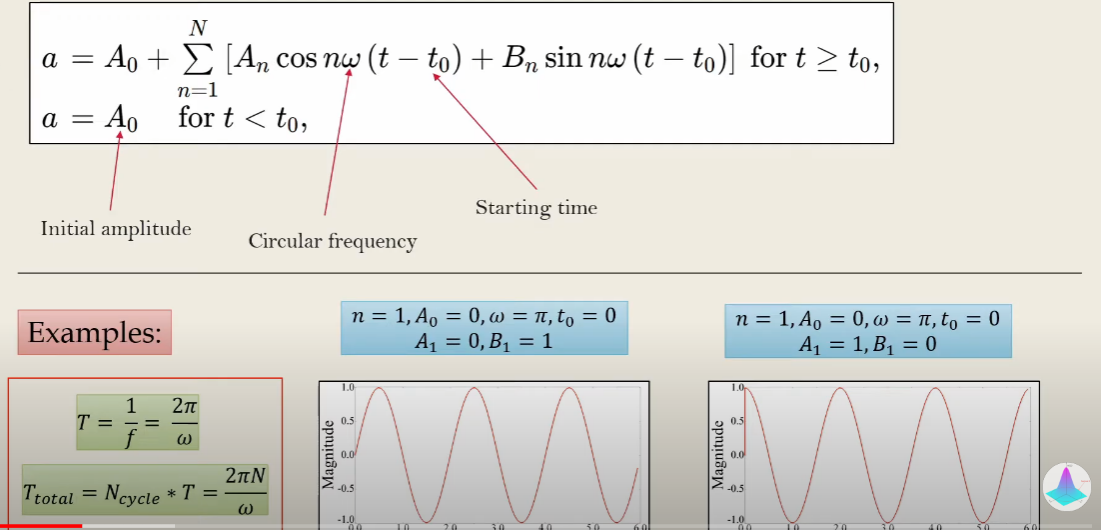

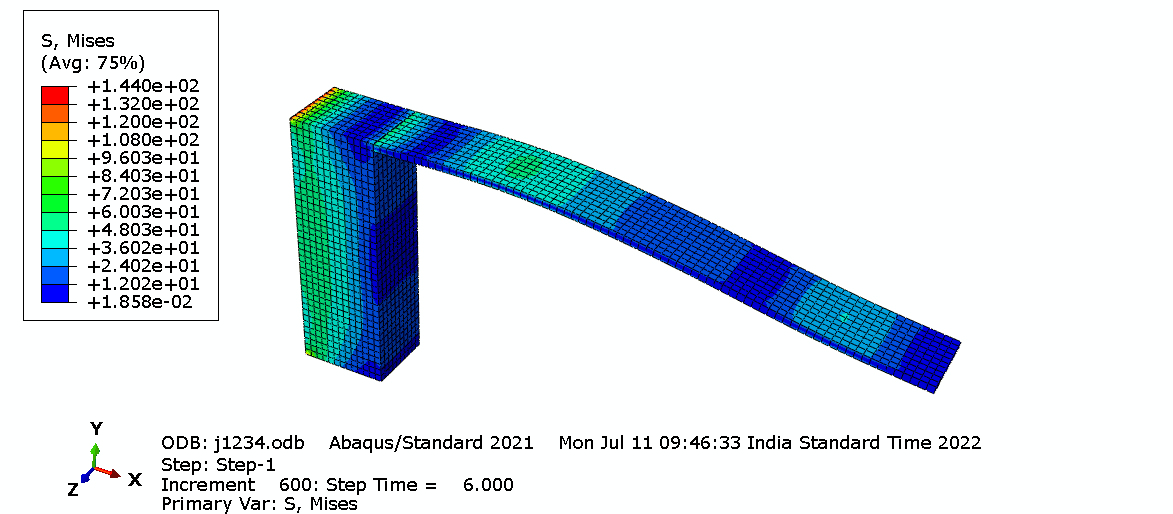